## About Dataset
In this study, after detailed Exploratory Data Analysis, 5 different machine learning models were tested on Titanic Data to answer the question **"What sorts of people were more likely to survive?"** and the best model for survival prediction was determined.  

Find out more about this dataset here: https://www.kaggle.com/competitions/titanic/overview

## Import Libraries and Upload Data

In [94]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LinearRegression

In [95]:
# Load Data
data = pd.read_csv("gender_submission.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Understand Data

In [96]:
# Display Data
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
# Display Train Data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
# Display Test Data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Brief About Terms/Variables:
- ***Survived*** = Survival; 0 = No, 1 = Yes  
- ***Pclass*** = Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd   
- ***age*** = Age; Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
- ***SibSp*** = # of siblings / spouses aboard the Titanic  
Sibling (brother, sister, stepbrother, stepsister)  
Spouse = husband, wife (mistresses and fiancés were ignored)  
- ***Parch*** = # of parents / children aboard the Titanic  
Some children travelled only with a nanny, therefore parch=0 for them  
- ***Ticket*** = Ticket number  
- ***Fare*** = Passenger fare  
- ***Cabin*** = Cabin number  
- ***Embarked*** = Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [99]:
# Display Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [100]:
# Display Data Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
# Display Data Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 891 entries which is the number of passengers
- There are 12 features (2 float, 5 integer, 5 object)
- There are NULL values.  

In [102]:
# Display Data Description
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
# Display Data Description
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---
#### Duplicate Values

In [104]:
# Remove Duplicate Rows
liste = [train_data, test_data]
for i in liste:
    print("Duplicate Data Sum:", i.duplicated().sum())
    if i.duplicated().sum() != 0:
        print("Before Removing Duplicates:", i.shape[0]) 
        i.drop_duplicates()
        print("After Removing Duplicates:", i.shape[0]) 

Duplicate Data Sum: 0
Duplicate Data Sum: 0


---
#### Null Values

In [105]:
# Check Null Values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
# Check Null Values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [107]:
# Fill Null Values
train_data.Age.fillna(train_data.Age.mean(), inplace = True)
train_data.Embarked.fillna("S", inplace = True)
test_data["Age"].fillna(test_data.Age.mean(), inplace = True)
test_data["Fare"].fillna(test_data.Fare.mode(), inplace = True)

# Drop Unnesesary Columns
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Insert Survived Coloumn
test_data.insert(0, "Survived", data["Survived"])

# Concat Train Data and Test Data
df = pd.concat([train_data, test_data], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


---
#### Nunique & Unique Values

In [108]:
# Explore Nunique Values
column_names = list(df.columns)
for col_name in column_names:
    print(col_name, ":", df[col_name].nunique())

Survived : 2
Pclass : 3
Sex : 2
Age : 100
SibSp : 7
Parch : 8
Fare : 281
Embarked : 3


In [109]:
# Explore Unique Values
cols = ["Pclass", "Embarked"]

for col in cols: 
    if isinstance(col, str):
        print(f"{col}:", df[col].unique())

Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q']


---
## Exploratory Data Analysis
### What was the general passenger profile?

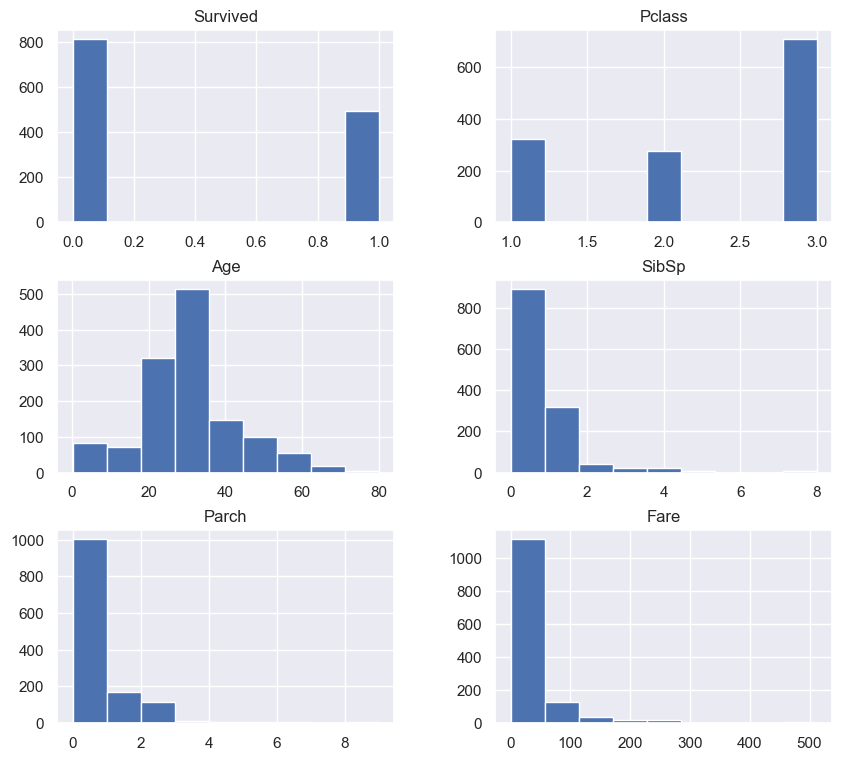

In [110]:
# Histogram of Variables
df.hist(bins=9, figsize=(10,9))
plt.show()

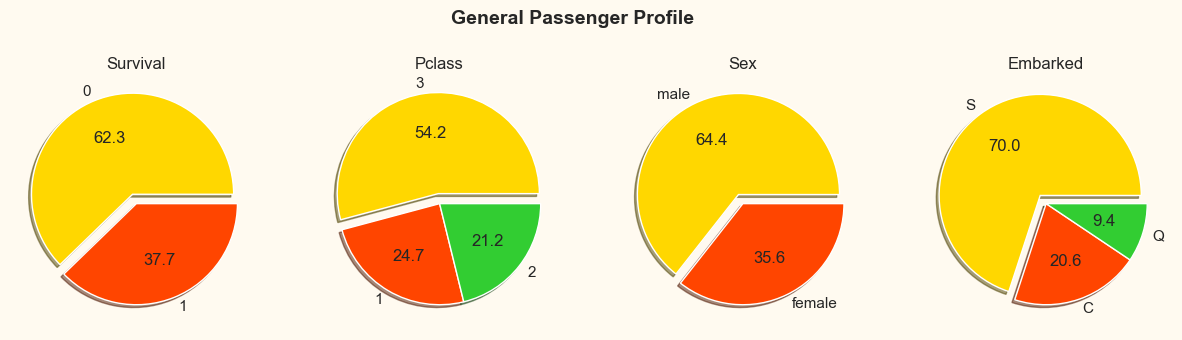

In [111]:
# Plot Pie
fig, ax  = plt.subplots(1,4, figsize = (15,4))
colors=["gold", "orangered","limegreen"]
fig.suptitle("General Passenger Profile", size = 14, weight = "bold")

df["Survived"].value_counts().plot.pie(title="Survival", explode=[.1,0], ax=ax[0], autopct="%.1f", shadow=True, colors=colors)
df["Pclass"].value_counts().plot.pie(title="Pclass", explode=[.1,0,0], ax=ax[1], autopct="%.1f", shadow=True, colors=colors)
df["Sex"].value_counts().plot.pie(title="Sex", explode=[.1,0], ax=ax[2], autopct="%.1f", shadow=True, colors=colors)
df["Embarked"].value_counts().plot.pie(title="Embarked", explode=[.1,0,0], ax=ax[3], autopct="%.1f", shadow=True, colors=colors)

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_ylabel("")

fig.patch.set_facecolor("floralwhite")
plt.show()

- More than half of the passengers did not survive, 3rd class passengers, male and boarded from Southampton.

---
### What was the percentage of survivors according to socio-economic class?

In [112]:
# Dataframe of Survival by Socio-Economic Class
pclass = df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
pclass = pd.DataFrame(pclass)
pclass["Percentage"] = round(pclass["Count"] *100/ len(df),2)
pclass

,Pclass,Survived,Count,Percentage
0,1,0,137,10.47
1,1,1,186,14.21
2,2,0,160,12.22
3,2,1,117,8.94
4,3,0,518,39.57
5,3,1,191,14.59


/var/folders/kf/ksmbz_952kn_sb3y_kwq_mth0000gp/T/ipykernel_60825/1921349175.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")


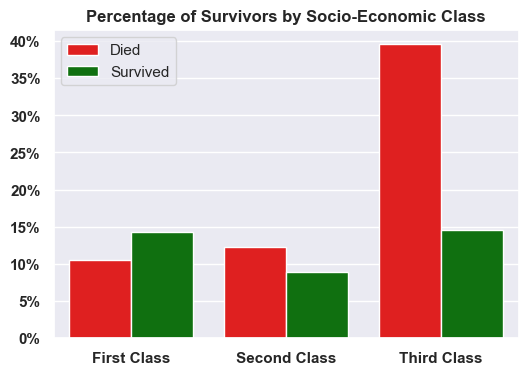

In [113]:
# Graph of Survivors by Socio-Economic Class
plt.figure(figsize=(6,4))
sns.set(style="darkgrid")
colour = ["red", "green"]
ax = sns.barplot(x = "Pclass", y = "Percentage", data=pclass, hue="Survived", palette=colour)

ax.set_title("Percentage of Survivors by Socio-Economic Class", weight = "semibold")
ax.set_xticklabels(["First Class", "Second Class", "Third Class"], weight = "bold")

vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set(xlabel= None, ylabel= None)

handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()

- The socio-economic status of the passengers played a big role in their survival.  
While more than half of the 1st class passengers survived, only a quarter of the 3rd class passengers survived.

---
### What was the percentage of survivors according to gender?

In [114]:
# Dataframe of Survival by Gender
gender = df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")
gender = pd.DataFrame(gender)
gender["Percentage"] = round(gender["Count"] * 100/len(df),2)
gender

,Sex,Survived,Count,Percentage
0,female,0,81,6.19
1,female,1,385,29.41
2,male,0,734,56.07
3,male,1,109,8.33


/var/folders/kf/ksmbz_952kn_sb3y_kwq_mth0000gp/T/ipykernel_60825/1775983240.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")


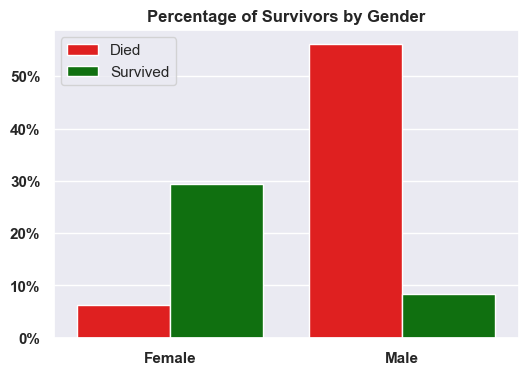

In [115]:
# Graph of Survivors by Gender
plt.figure(figsize=(6,4))
sns.set(style="darkgrid")
colour = ["red", "green"]
ax = sns.barplot(x = "Sex", y = "Percentage", data=gender, hue="Survived", palette=colour)

ax.set_title("Percentage of Survivors by Gender", weight = "semibold")
ax.set_xticklabels(["Female", "Male"], weight = "bold")
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set(xlabel= None, ylabel= None)   # Hiding axis text

handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()

- First of all, the women were rescued and most of the men lost their lives.

---
### What was the probability of survival according to age?

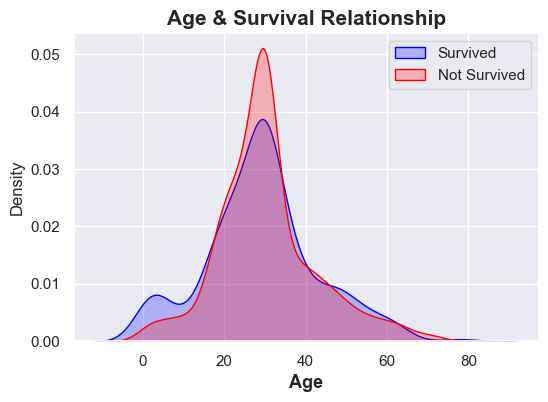

In [116]:
# Age and Survival Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(df["Age"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Age"][df.Survived == 0.0], color="red", fill="Fill")

plt.legend(["Survived", "Not Survived"])
plt.title("Age & Survival Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Age", fontsize=13, fontweight="bold")
plt.show()

- More emphasis was placed on rescuing children, middle-young people generally lost their lives.  
While the survival rate of mature people is slightly higher, the very old did not survive.

---
### What was the probability of survival of those with siblings/spouse?

In [117]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


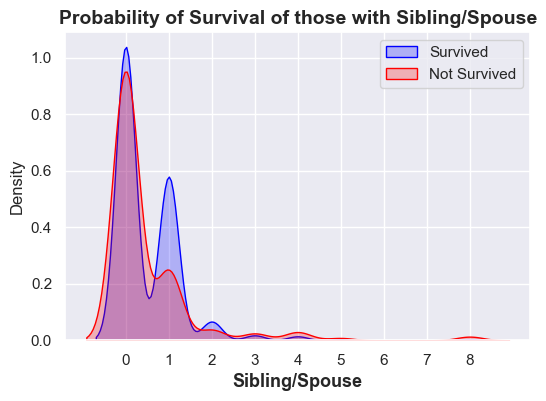

In [118]:
# SibSp and Survival Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(df["SibSp"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["SibSp"][df.Survived == 0.0], color="red", fill="Fill")

plt.legend(["Survived", "Not Survived"])
plt.title("Probability of Survival of those with Sibling/Spouse", fontsize=14, fontweight="bold")
ax.set_xlabel(xlabel="Sibling/Spouse", fontsize=13, fontweight="bold")
plt.xticks(np.arange(0,9,1))
plt.show()

- Those who have siblings/spouse are more likely to survive than those who do not.

---
### What was the probability of survival of those with parents/children?

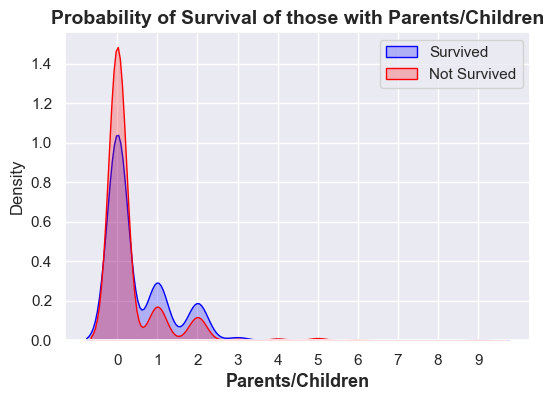

In [119]:
# Parch and Survival Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(df["Parch"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Parch"][df.Survived == 0.0], color="red", fill="Fill")

plt.legend(["Survived", "Not Survived"])
plt.title("Probability of Survival of those with Parents/Children", fontsize=14, fontweight="bold")
ax.set_xlabel(xlabel="Parents/Children", fontsize=13, fontweight="bold")
plt.xticks(np.arange(0,10,1))
plt.show()

- Those with one or two parents/children are more likely to survive than those without.

---
### What was the passenger fare survival relationship?

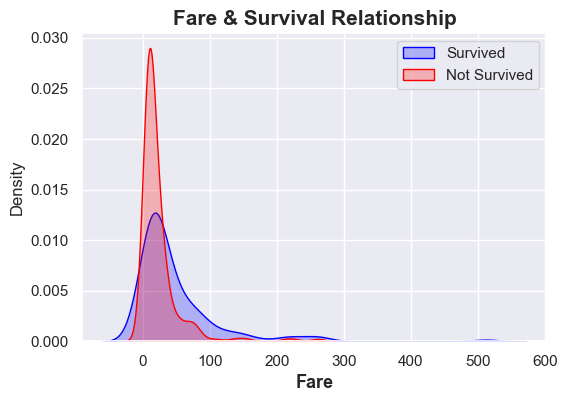

In [120]:
# Fare and Survival Relationship
plt.figure(figsize=(6,4))

ax = sns.kdeplot(df["Fare"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Fare"][df.Survived == 0.0], color="red", fill="Fill")

plt.legend(["Survived", "Not Survived"])
plt.title("Fare & Survival Relationship", fontsize=15, fontweight="bold")
ax.set_xlabel(xlabel="Fare", fontsize=13, fontweight="bold")
plt.show()

- Those with expensive tickets are more likely to survive than those with cheap tickets.

---
### What was the percentage of survivors according to the embarkation point?

In [121]:
# Dataframe of Survivors by the Embarkation Point
embark = df.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark = pd.DataFrame(embark)
embark["Percentage"] = round(embark["Count"] * 100/len(df),2)
embark

,Embarked,Survived,Count,Percentage
0,C,0,137,10.47
1,C,1,133,10.16
2,Q,0,69,5.27
3,Q,1,54,4.13
4,S,0,609,46.52
5,S,1,307,23.45


/var/folders/kf/ksmbz_952kn_sb3y_kwq_mth0000gp/T/ipykernel_60825/3711303517.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:g}%" for x in vals], fontweight="semibold")


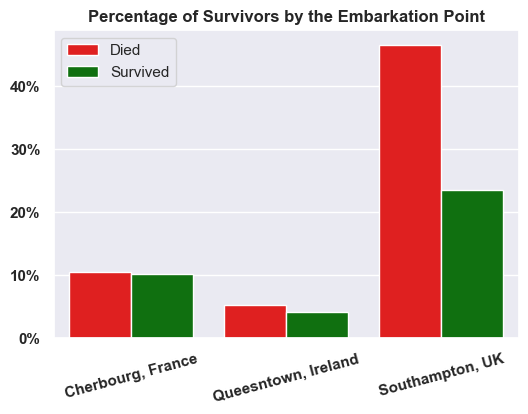

In [122]:
# Graph of Survivors by the Embarkation Point
plt.figure(figsize=(6,4))
sns.set(style="darkgrid")
colour = ["red", "green"]
ax = sns.barplot(x = "Embarked", y = "Percentage", data=embark, hue="Survived", palette=colour)

# Set Titles
ax.set_title("Percentage of Survivors by the Embarkation Point", weight = "semibold")
ax.set_xticklabels(["Cherbourg, France", "Queesntown, Ireland", "Southampton, UK"], rotation =15, fontweight="semibold")
ax.set(xlabel= None, ylabel= None)  # Hiding axis text
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], fontweight="semibold")

# Set Label
handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()

- Almost half of those who embarked from France and Ireland survived, while two-thirds of those who embarked from the UK died.

---
### Prepare Dataset

In [123]:
# Replacing Sex for easy count (male = 0, female = 1)
train_data["Sex"] = np.where(train_data["Sex"] == "female", 1, 0)
test_data["Sex"] = np.where(test_data["Sex"] == "female", 1, 0)
# Different Approach
# train_data["Sex"] = train_data["Sex"].replace({"male": 0, "female": 1})
# test_data["Sex"] = test_data["Sex"].replace({"male": 0, "female": 1})

# Display Data
display("Train Data:", train_data.head())
display("Test Data:", test_data.head())

'Train Data:'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


'Test Data:'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,1,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S


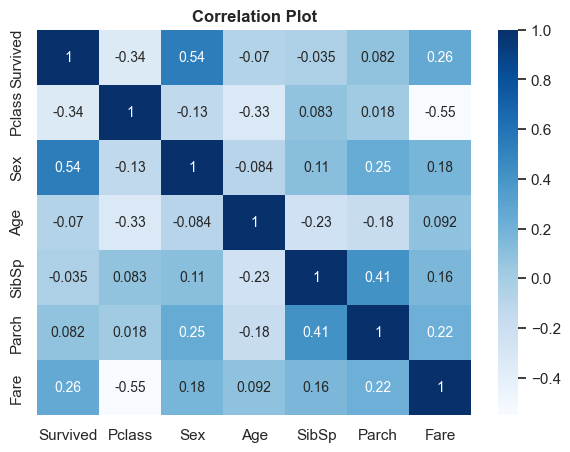

In [124]:
# Check for Correlation
corr_mat = train_data.corr(numeric_only=True)

# Showing Correlation Using Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_mat, annot=True, cmap= "Blues", annot_kws={"size":10})
plt.title("Correlation Plot", loc = "center", weight="bold")
plt.show()

In [125]:
# Drop Unnecessary Columns
train_data.drop(["Pclass","SibSp","Fare","Embarked"], axis=1, inplace=True)
test_data.drop(["Pclass","SibSp","Fare","Embarked"], axis=1, inplace=True)

In [126]:
# Spliting Dataset
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]

X_test = test_data.drop("Survived", axis=1)
y_test = test_data["Survived"]

In [127]:
# Standardiazation (Feature Scaling)
scaler_x = StandardScaler()   # Input data is transformed to have a mean of zero and variance of 1
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

---

## Logistic Regression

In [128]:
# Logistic Regression Model
Log_reg = LogisticRegression()

# Train the Model
Log_reg.fit(X_train, y_train)

# Make Prediction
y_pred = Log_reg.predict(X_test)

In [129]:
# Get the Result in a Dataframe
result = {"Actual Survival":y_test, "Predicted Survival": y_pred}
result_df = pd.DataFrame(result)
result_df.head()

,Actual Survival,Predicted Survival
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


In [130]:
# Accuaracy
print("Accuarcy  :", metrics.accuracy_score(y_test, y_pred))

# Check Accuarcy   (For higher accuracy, Rsquared should be closer to 1 and Errors to 0)
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared : {:.2f}".format(Log_reg.score(X_test, y_test)))
print("Mean Absolute Error    :", meanAbError)
print("Mean Square Error      :", meanSqError)
print("Root Mean Square Error :", rootMeanSqrr)

Accuarcy  : 0.9976076555023924
R squared : 1.00
Mean Absolute Error    : 0.0023923444976076554
Mean Square Error      : 0.0023923444976076554
Root Mean Square Error : 0.048911598804451846


In [131]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  1, 151]])

- Logistic Regression model is 99% accurate.
- Confusion matrix is consistent with the result. 
- Rsquared and Error results are also consistent with the Accuracy result.

---

## Gaussian Naive Bayes (GaussianNB)

In [132]:
# Create Naive Bayes Gaussian Model
gaussian_model = GaussianNB()

# Train the Model
gaussian_model.fit(X_train, y_train)

# Make Prediction
y_pred = gaussian_model.predict(X_test)

# Accuarcy
print("Accuarcy  :", metrics.accuracy_score(y_test, y_pred))

# Calculate Accuracy of the Model   (For higher accuracy, Rsquared should be closer to 1 and Errors to 0)
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared : {:.2f}".format(Log_reg.score(X_test, y_test)))
print("Mean Absolute Error    :", meanAbError)
print("Mean Square Error      :", meanSqError)
print("Root Mean Square Error :", rootMeanSqrr)

Accuarcy  : 0.9976076555023924
R squared : 1.00
Mean Absolute Error    : 0.0023923444976076554
Mean Square Error      : 0.0023923444976076554
Root Mean Square Error : 0.048911598804451846


In [133]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  1, 151]])

- It gave exactly the same result as logistic regression and it is a very good model.  
In fact, the Gaussian Naive Bayes model is faster by seconds.

---

## Bernoulli Naive Bayes (BernoulliNB)

In [134]:
# Create Naive Bayes Gaussian Model
bernoulli_model = BernoulliNB()

# Train the Model
bernoulli_model.fit(X_train, y_train)

# Make Prediction
y_pred = bernoulli_model.predict(X_test)

# Accuarcy
print("Accuarcy  :", metrics.accuracy_score(y_test, y_pred))

# Calculate Accuracy of the Model   (For higher accuracy, Rsquared should be closer to 1 and Errors to 0)
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared : {:.2f}".format(Log_reg.score(X_test, y_test)))
print("Mean Absolute Error    :", meanAbError)
print("Mean Square Error      :", meanSqError)
print("Root Mean Square Error :", rootMeanSqrr)

Accuarcy  : 1.0
R squared : 1.00
Mean Absolute Error    : 0.0
Mean Square Error      : 0.0
Root Mean Square Error : 0.0


In [135]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  0, 152]])

- Bernoulli Naive Bayes Model has overfitting problem.

---
## Decision Tree

In [136]:
# Create Default Decision Tree Classifer Object
decisionTree_model_gini = DecisionTreeClassifier()

# Use Entropy Criterion 
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use Max Depth
decisionTree_model_depth = DecisionTreeClassifier(max_depth=3)

# Fit the Trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth.fit(X_train,y_train)

# Make Prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth.predict(X_test)

# Calculate Accuracy of the Model
print("Accuracy (Gini)    :", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy) :", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Depth)   :", metrics.accuracy_score(y_test, y_pred_depth3))

Accuracy (Gini)    : 0.7966507177033493
Accuracy (Entropy) : 0.7942583732057417
Accuracy (Depth)   : 0.9736842105263158


---

## Support Vector Machines (SVMs)

In [137]:
# Create 3 SVM Classifiers
linear_SVM = svm.SVC(kernel="linear")    # Linear Kernel
sigmoid_SVM = svm.SVC(kernel="sigmoid")  # Sigmoid Kernel
rbf_SVM = svm.SVC(kernel="rbf")          # RBF Kernel

# Train the Models
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

# Make Prediction
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

# Calculate Accuracy of the Model (Accuracy should be close to 1 for more accurate result)
print("Accuracy (linear)  :", metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy (sigmoid) :", metrics.accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy (rbf)     :", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy (linear)  : 1.0
Accuracy (sigmoid) : 0.8014354066985646
Accuracy (rbf)     : 0.9712918660287081


---

## CONCLUSION
#### The best models are *Logistic Regression* and *Gaussian Naive Bayes* Models.